In [69]:
# Python Project 2
### Question : What is the difference between peoples's race and gender with diabetes? Who is at a higher risk?

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

df.head()
df.shape
df.describe()

### Cleaning: Deleting Weight and payer_Code

df.drop('weight', axis=1, inplace = True)
df.drop('payer_code', axis=1, inplace = True)

df.dropna()

df.head()

###changing the index to encounter_id 
#check first if the ID is unique 
df['encounter_id'].is_unique 
#it is true 

df = df.set_index('encounter_id')


,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,11,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,?,51,...,No,Down,No,No,No,No,No,Ch,Yes,>30
443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,?,33,...,No,Steady,No,No,No,No,No,No,Yes,NO
443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,?,53,...,No,Down,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#Renaming Columns 
df.rename(columns={"encounter_id": "patient_id", "patient_nbr": "patient_num"})

In [46]:

# removing special character 

df['race'] = df['race'].str.replace(r'?', '', regex=True)
df['medical_specialty'] = df['medical_specialty'].str.replace(r'?', '', regex=True)

df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),1,1,7,3,,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,,11,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),1,1,7,2,,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),1,1,7,1,,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [75]:
# Using group by to see Which gencder and race has the most diabetes
df.groupby(['gender'])['race'].count() #more women have diabetes 54708 Women & 47055 Men

df.groupby(['race'])['gender'].count() #Afrian Americans and Caucasian had Diabetes the most compared to other races 
#Afrian American 19210 Caucasian 76099




race
?                   2273
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
Name: gender, dtype: int64

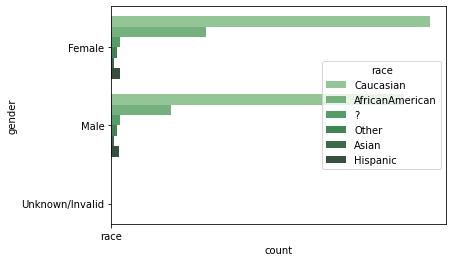

In [73]:
#Could not plot because the data is non numerical so I was getting a type error. Therefore I decided to use seaborn, works well
sns.countplot(y='gender', hue='race', data=df, palette="Greens_d")

#Trying scatter plot with matplotlib 
plt.scatter(x='race', y= 'gender')

<AxesSubplot:xlabel='gender', ylabel='race'>

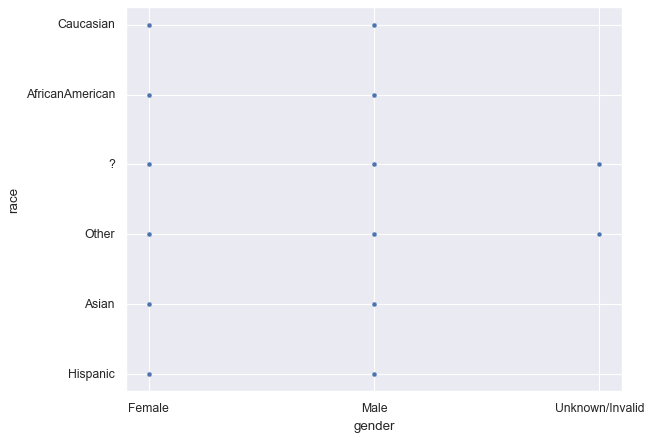

In [87]:
#Trying another plot 
sns.scatterplot(x='gender',y='race',data=df)

#### Working with the Data set was great because it was much more organized than the previous School regents Scores Data. My question was "what is the difference between race and gender with diabetes? Who is at a higher risk?". I started of by checking what was in the data then cleaning the columns by dropping the ones with no values. I set the index as the one that is already in the data frame by checking if the ID was unique then changing it. I then removed the special character "?" in other columns, I got a warning message when I used a different code that worked as well. I found that when "regex=True" is used, it gets rid of the warning and the gets rid of the special character. I used groupby to see how race and gender were impacted by diabeties. More women have diabetes around 5,4708 were Women and 4,7055 were Men. Afrian Americans and Caucasian had Diabetes the most compared to other races, Afrian American 19,210 Caucasian 76,099.  The groupby really helped to see the difference between race and gender, Caucasian women were at a higher risk and Caucasian men were also 2nd place in being at risk. The graph I created with seaborn shows this clearly. 